In [1]:
import numpy as np
import pandas as pd

## Скачиваем смотрим соединяем

In [2]:
X_train_val = pd.read_csv('train_features.csv', header=0)
y_train_val = pd.read_csv('train_targets.csv', header=0)
X_test = pd.read_csv('test_features.csv', header=0)
y_test = pd.read_csv('sample_submission.csv')
X_train_val.shape, y_train_val.shape, X_test.shape, y_test.shape

((5808, 11), (5808, 5), (3984, 11), (3984, 5))

In [3]:
for data in [X_train_val, X_test, y_train_val, y_test]:
    data.timestamp = pd.to_datetime(data.timestamp, format='%Y-%m-%d %H:%M:%S')

In [4]:
t_train_start, t_train_end, t_test_start, t_test_end = X_train_val.timestamp.min(), X_train_val.timestamp.max(), \
                                                       X_test.timestamp.min(), X_test.timestamp.max()
t_train_start, t_train_end, t_test_start, t_test_end

(Timestamp('2020-01-01 00:00:00'),
 Timestamp('2020-04-30 23:30:00'),
 Timestamp('2020-05-01 00:00:00'),
 Timestamp('2020-07-22 23:30:00'))

In [5]:
Xy_train_val = pd.merge(X_train_val, y_train_val, on='timestamp')
Xy_train_val.set_index('timestamp', inplace=True)

In [6]:
Xy_test = pd.merge(X_test, y_test, on='timestamp')
Xy_test.set_index('timestamp', inplace=True)

In [7]:
Xy_train_val.shape, Xy_test.shape

((5808, 14), (3984, 14))

## Графики

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

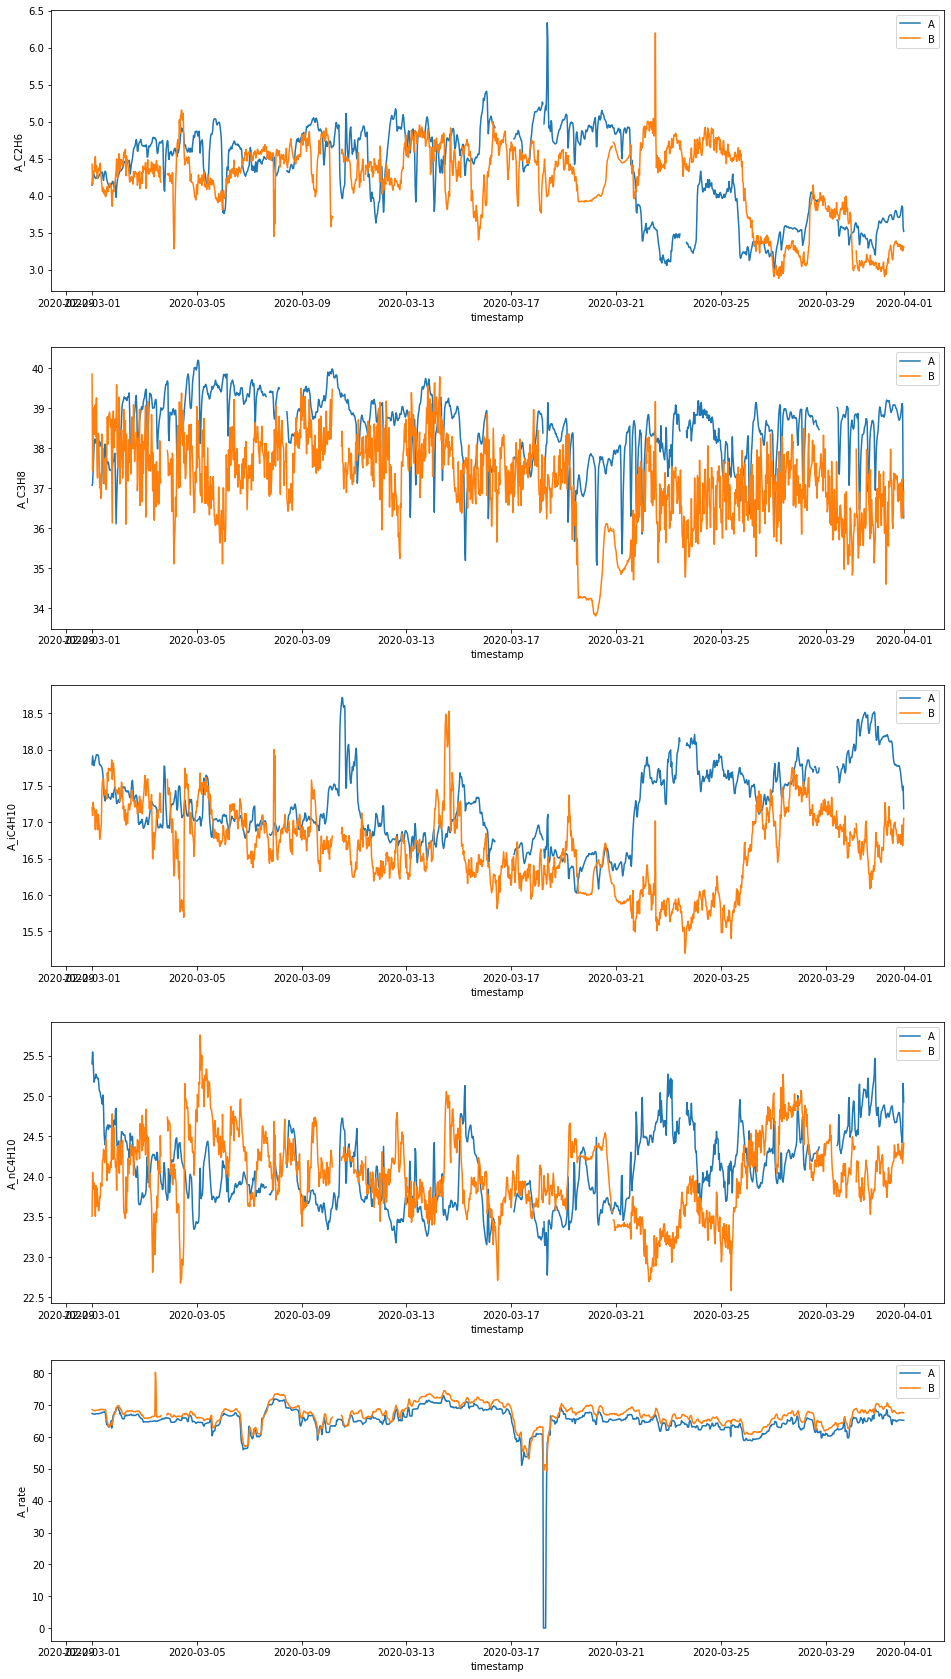

In [9]:
fig, ax = plt.subplots(5, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_rate', ax=ax[4], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_rate', ax=ax[4], label='B')

plt.show()

In [10]:
def draw_corr_with_lags(a, b, start=1, stop=220, step=1):
    data = Xy_train_val.loc[:, [a, b]]
    for i in range(start, stop, step):
        data[f'{a}_{i}'] = data[a].shift(i)
    
    data.drop(columns=a, inplace=True)
    
    plt.figure(figsize=(17, 2))
    sns.heatmap(data.corr(method='pearson').iloc[:1, 1:], annot=True, annot_kws={'size': 11}, linewidths=1)
    # sns.heatmap(data.corr(method='spearman').iloc[:1, 1:], annot=True, annot_kws={'size': 11}, linewidths=1)

### Убираем выбросы

In [11]:
Xy_train_val = Xy_train_val.mask(Xy_train_val.sub(Xy_train_val.mean()).div(Xy_train_val.std()).abs().gt(2))

### A_C2H6

<AxesSubplot:xlabel='timestamp', ylabel='A_C2H6'>

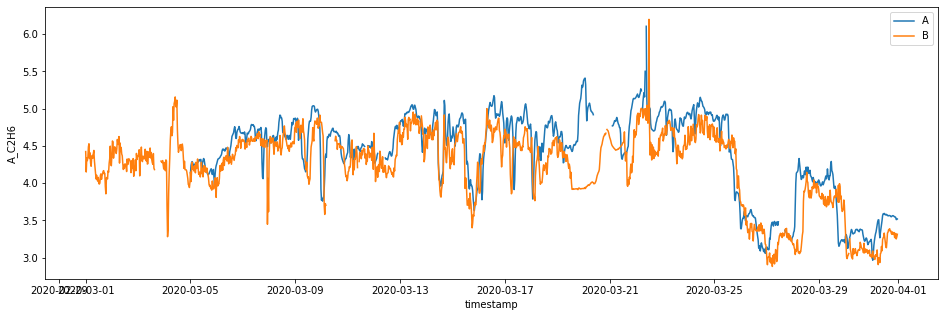

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3].shift(192), x='timestamp', y='A_C2H6', label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_C2H6', label='B')

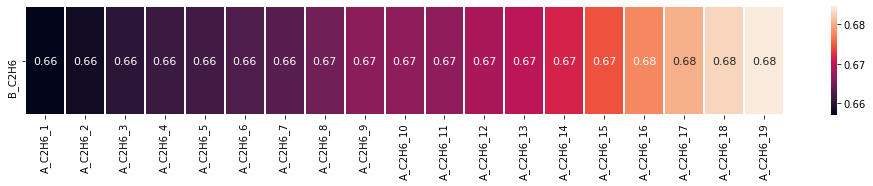

In [13]:
draw_corr_with_lags('A_C2H6', 'B_C2H6', 1, 20, 1)

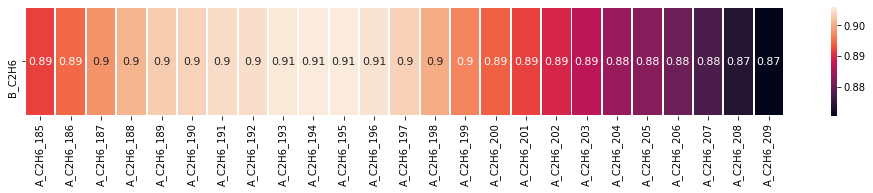

In [14]:
draw_corr_with_lags('A_C2H6', 'B_C2H6', 185, 210, 1)

### A_C3H8

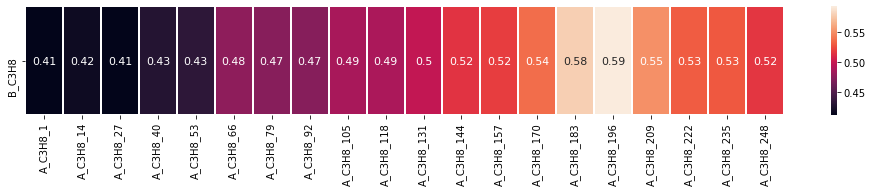

In [15]:
draw_corr_with_lags('A_C3H8', 'B_C3H8', 1, 250, 13)

<AxesSubplot:xlabel='timestamp', ylabel='A_C3H8'>

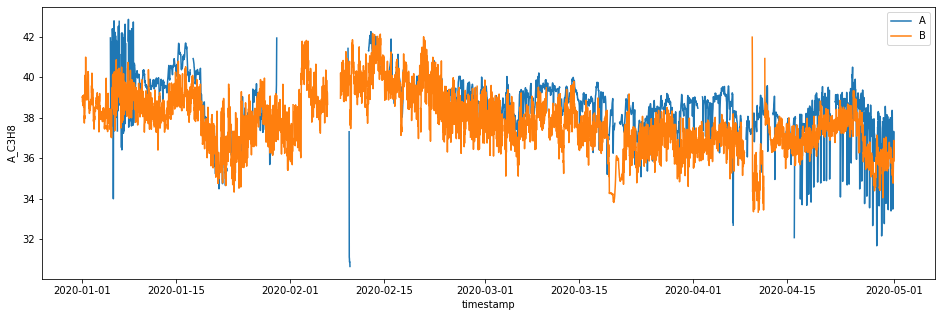

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

sns.lineplot(data=Xy_train_val.shift(192), x='timestamp', y='A_C3H8', label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_C3H8', label='B')

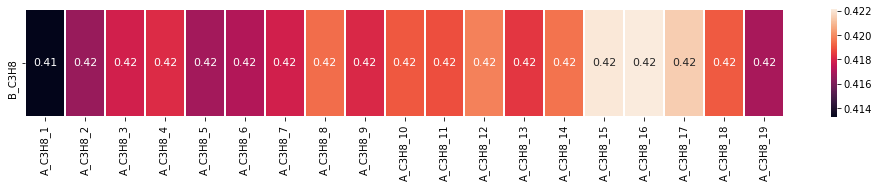

In [17]:
draw_corr_with_lags('A_C3H8', 'B_C3H8', 1, 20, 1)

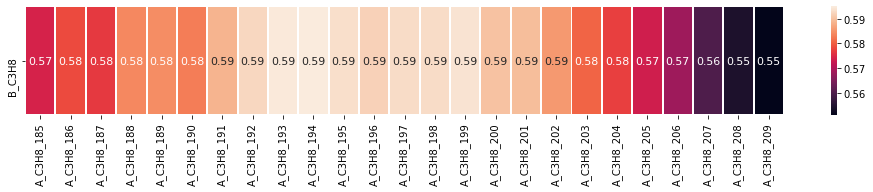

In [18]:
draw_corr_with_lags('A_C3H8', 'B_C3H8', 185, 210, 1)

### A_iC4H10

<AxesSubplot:xlabel='timestamp', ylabel='A_iC4H10'>

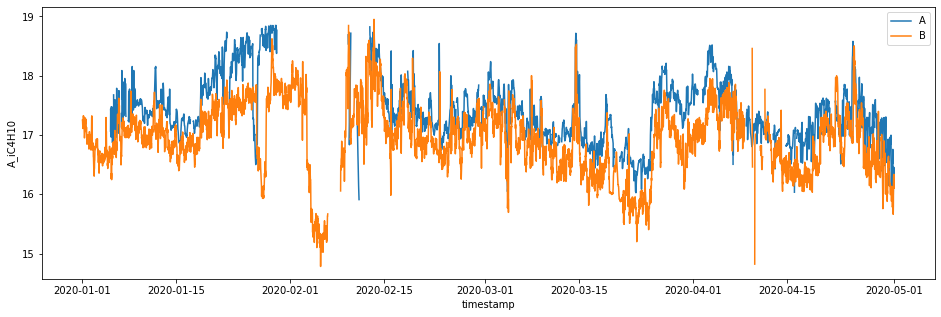

In [19]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

sns.lineplot(data=Xy_train_val.shift(192), x='timestamp', y='A_iC4H10', label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_iC4H10', label='B')

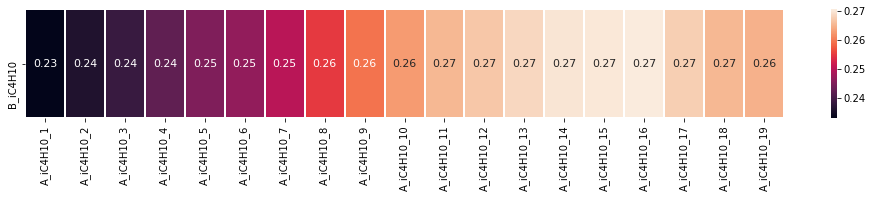

In [20]:
draw_corr_with_lags('A_iC4H10', 'B_iC4H10', 1, 20, 1)

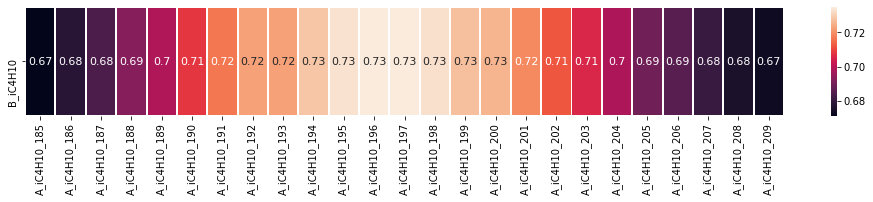

In [21]:
draw_corr_with_lags('A_iC4H10', 'B_iC4H10', 185, 210, 1)

### A_nC4H10

<AxesSubplot:xlabel='timestamp', ylabel='A_nC4H10'>

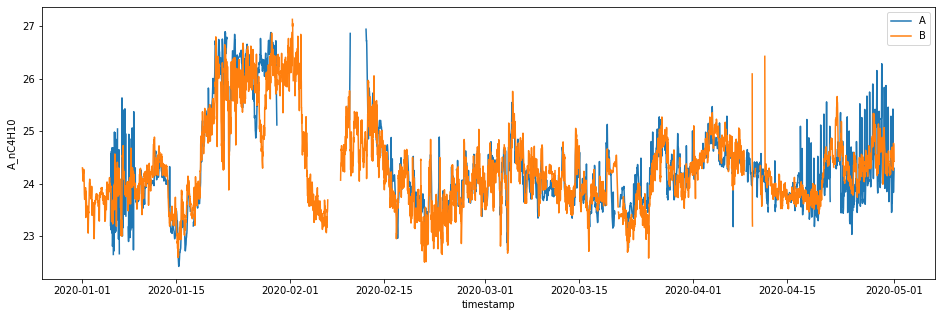

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(16, 5))

sns.lineplot(data=Xy_train_val.shift(192), x='timestamp', y='A_nC4H10', label='A')
sns.lineplot(data=Xy_train_val, x='timestamp', y='B_nC4H10', label='B')

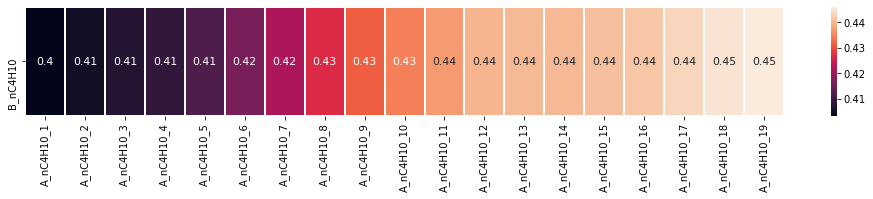

In [23]:
draw_corr_with_lags('A_nC4H10', 'B_nC4H10', 1, 20, 1)

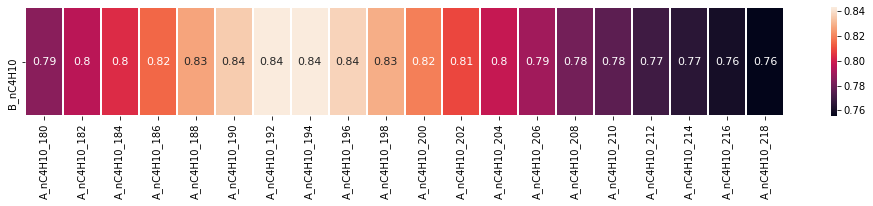

In [24]:
draw_corr_with_lags('A_nC4H10', 'B_nC4H10', 180, 220, 2)

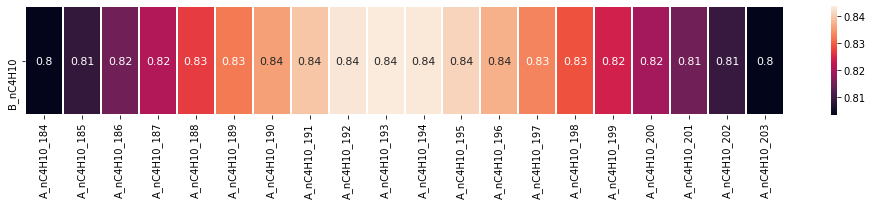

In [25]:
draw_corr_with_lags('A_nC4H10', 'B_nC4H10', 184, 204, 1)

In [26]:
Xy_train_val['B_C2H6'].shift(-192)

timestamp
2020-01-01 00:00:00    4.760272
2020-01-01 00:30:00    4.801612
2020-01-01 01:00:00    4.764541
2020-01-01 01:30:00    4.753175
2020-01-01 02:00:00    4.746413
                         ...   
2020-04-30 21:30:00         NaN
2020-04-30 22:00:00         NaN
2020-04-30 22:30:00         NaN
2020-04-30 23:00:00         NaN
2020-04-30 23:30:00         NaN
Name: B_C2H6, Length: 5808, dtype: float64

In [27]:
Xy_train_val['A_C2H6'].fillna(Xy_train_val['B_C2H6'].shift(-192), inplace=True)
Xy_train_val['A_C3H8'].fillna(Xy_train_val['B_C3H8'].shift(-192), inplace=True)
Xy_train_val['A_iC4H10'].fillna(Xy_train_val['B_iC4H10'].shift(-192), inplace=True)
Xy_train_val['A_nC4H10'].fillna(Xy_train_val['B_nC4H10'].shift(-192), inplace=True)

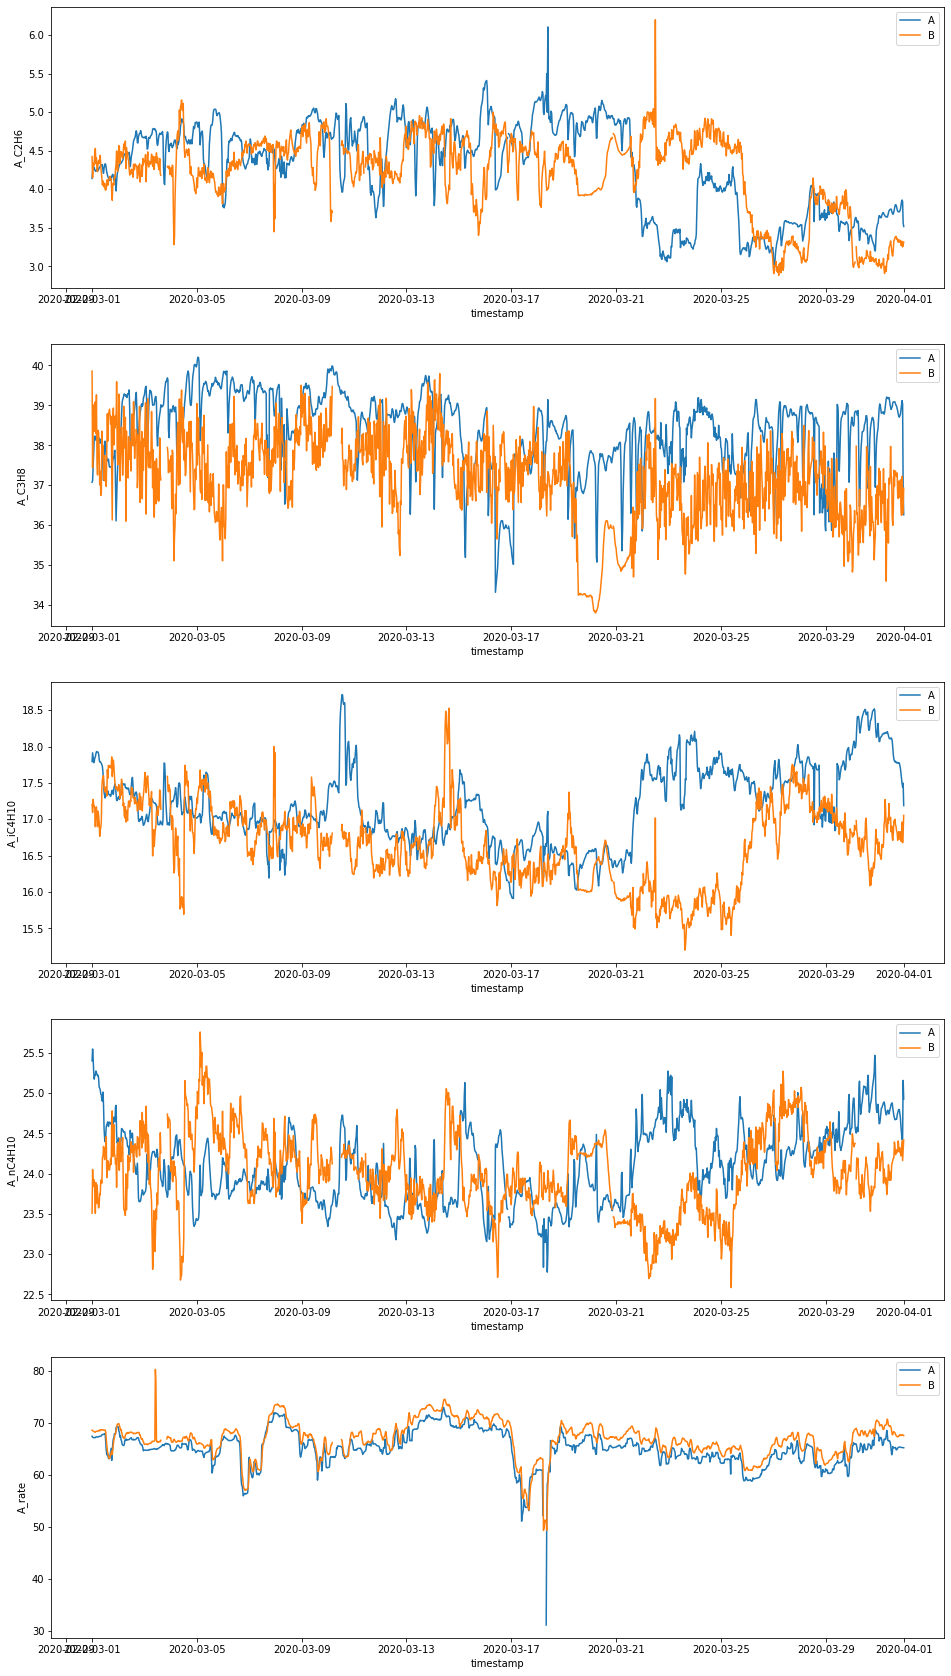

In [28]:
fig, ax = plt.subplots(5, 1, figsize=(16, 30))

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_C2H6', ax=ax[0], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_C2H6', ax=ax[0], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_C3H8', ax=ax[1], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_C3H8', ax=ax[1], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_iC4H10', ax=ax[2], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_iC4H10', ax=ax[2], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_nC4H10', ax=ax[3], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_nC4H10', ax=ax[3], label='B')

sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='A_rate', ax=ax[4], label='A')
sns.lineplot(data=Xy_train_val[Xy_train_val.index.month == 3], x='timestamp', y='B_rate', ax=ax[4], label='B')

plt.show()

In [29]:
Xy = pd.concat([Xy_train_val, Xy_test], axis=0)

for name in ['A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10']:
    for i in range(188, 201, 1):
        Xy.loc[:, f'{name}_{i}'] = Xy.loc[:, name].shift(i)

for name in ['A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10', 
             'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate']:
    Xy.loc[:, f'{name}_1'] = Xy.loc[:, name].shift(1)
    Xy.loc[:, f'{name}_diff'] = Xy.loc[:, name].diff(1)

Xy = Xy.iloc[200:]

Xy['day_of_month'] = Xy.index.day.to_numpy()
Xy['day_of_week'] = Xy.index.dayofweek.to_numpy()
Xy['hour'] = Xy.index.hour.to_numpy()

Xy.shape, len(Xy.columns), Xy.columns

((9592, 89),
 89,
 Index(['A_rate', 'A_CH4', 'A_C2H6', 'A_C3H8', 'A_iC4H10', 'A_nC4H10',
        'A_iC5H12', 'A_nC5H12', 'A_C6H14', 'B_rate', 'B_C2H6', 'B_C3H8',
        'B_iC4H10', 'B_nC4H10', 'A_C2H6_188', 'A_C2H6_189', 'A_C2H6_190',
        'A_C2H6_191', 'A_C2H6_192', 'A_C2H6_193', 'A_C2H6_194', 'A_C2H6_195',
        'A_C2H6_196', 'A_C2H6_197', 'A_C2H6_198', 'A_C2H6_199', 'A_C2H6_200',
        'A_C3H8_188', 'A_C3H8_189', 'A_C3H8_190', 'A_C3H8_191', 'A_C3H8_192',
        'A_C3H8_193', 'A_C3H8_194', 'A_C3H8_195', 'A_C3H8_196', 'A_C3H8_197',
        'A_C3H8_198', 'A_C3H8_199', 'A_C3H8_200', 'A_iC4H10_188',
        'A_iC4H10_189', 'A_iC4H10_190', 'A_iC4H10_191', 'A_iC4H10_192',
        'A_iC4H10_193', 'A_iC4H10_194', 'A_iC4H10_195', 'A_iC4H10_196',
        'A_iC4H10_197', 'A_iC4H10_198', 'A_iC4H10_199', 'A_iC4H10_200',
        'A_nC4H10_188', 'A_nC4H10_189', 'A_nC4H10_190', 'A_nC4H10_191',
        'A_nC4H10_192', 'A_nC4H10_193', 'A_nC4H10_194', 'A_nC4H10_195',
        'A_nC4H10_196', 'A

In [30]:
Xy_exp_train_val, Xy_exp_test = Xy.loc[t_train_start:t_train_end], Xy.loc[t_test_start:t_test_end]
Xy_exp_train_val.shape, Xy_exp_test.shape

((5608, 89), (3984, 89))

In [31]:
values_for_filling_na = Xy_exp_train_val.mean(axis=0).values
for i, col in enumerate(Xy_exp_train_val.columns):
    Xy_exp_train_val[col].fillna(values_for_filling_na[i], inplace=True)
    Xy_exp_test[col].fillna(values_for_filling_na[i], inplace=True)

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [32]:
Xy_exp_train_val.shape, Xy_exp_test.shape

((5608, 89), (3984, 89))

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(Xy_exp_train_val.drop(columns=['B_C2H6', 'B_C3H8', 
                                                                                     'B_iC4H10', 'B_nC4H10']), 
                                                      Xy_exp_train_val.loc[:, ['B_C2H6', 'B_C3H8', 
                                                                               'B_iC4H10', 'B_nC4H10']], 
                                                      test_size=0.3, shuffle=False)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((3925, 85), (1683, 85), (3925, 4), (1683, 4))

In [45]:
from catboost import CatBoostRegressor
from sklearn.linear_model import Lasso

In [35]:
mape = lambda y_true, y_pred: np.mean(((y_true - y_pred) / y_true).abs().mean().values) * 100

In [36]:
X = Xy_exp_train_val.drop(columns=['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'])
y = Xy_exp_train_val.loc[:, ['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']]

In [37]:
from hyperopt import hp, fmin, tpe

In [38]:
def return_best_model(X_tr, y_tr, X_test, y_test, X, y, num_of_evals = 10):
    
    def hyperopt_opt_score(params):
        reg = CatBoostRegressor(allow_writing_files=False, verbose=False, **params, random_seed=42, objective='MAPE',
                                cat_features=['day_of_month', 'day_of_week', 'hour']).fit(X_tr, y_tr)
        
        y_pred = reg.predict(X_test)
        
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
    cb_space = {
        'eta': hp.uniform('eta', 0.01, 0.20),
        'n_estimators': hp.choice('n_estimators', np.arange(200, 1000, 100)),
        'depth': hp.choice('depth', np.arange(3, 8, 1)),
        'subsample': hp.uniform('subsample', 0.7, 1.0),
        'rsm': hp.uniform('rsm', 0.7, 1.0),
        'l2_leaf_reg': hp.choice('l2_leaf_reg', np.arange(3, 10, 2))
    }
    
    best_params = fmin(fn = hyperopt_opt_score, space = cb_space, algo = tpe.suggest, max_evals = num_of_evals)
    
    best_params['n_estimators'] = np.arange(200, 1000, 100)[best_params['n_estimators']]
    best_params['l2_leaf_reg'] = np.arange(3, 10, 2)[best_params['l2_leaf_reg']]
    best_params['depth'] = np.arange(3, 8, 1)[best_params['depth']]
    
    print(best_params)
    
    reg = CatBoostRegressor(allow_writing_files=False, verbose=200, **best_params, random_seed=42, objective='MAPE',
                            cat_features=['day_of_month', 'day_of_week', 'hour']).fit(X, y)
    return reg

In [48]:
def return_best_lasso_model(X_tr, y_tr, X_test, y_test, X, y, num_of_evals = 10):
    
    def hyperopt_opt_score(params):
        reg = Lasso(normalize=True, **params).fit(X_tr, y_tr)
        
        y_pred = reg.predict(X_test)
        
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
    cb_space = {
        'alpha': hp.uniform('alpha', 0.0001, 10000),
    }
    
    best_params = fmin(fn = hyperopt_opt_score, space = cb_space, algo = tpe.suggest, max_evals = num_of_evals)
    
    print(best_params)
    
    reg = Lasso(normalize=True, **best_params).fit(X, y)
    
    return reg

In [39]:
models = {}
for col in y.columns:
    models[col] = return_best_model(X_train, y_train[col], X_valid, y_valid[col], X, y[col], num_of_evals = 50)

100%|██████████| 50/50 [05:04<00:00,  6.10s/trial, best loss: 8.105485095730986]
{'depth': 3, 'eta': 0.06259283661608944, 'l2_leaf_reg': 7, 'n_estimators': 400, 'rsm': 0.702835517943233, 'subsample': 0.7640337709669863}
0:	learn: 0.1847623	total: 4.66ms	remaining: 1.86s
200:	learn: 0.0348311	total: 1.16s	remaining: 1.15s
399:	learn: 0.0321640	total: 2.35s	remaining: 0us
100%|██████████| 50/50 [06:03<00:00,  7.28s/trial, best loss: 2.144969240027895] 
{'depth': 4, 'eta': 0.02199108558937227, 'l2_leaf_reg': 5, 'n_estimators': 300, 'rsm': 0.7002390398181009, 'subsample': 0.800737727493869}
0:	learn: 0.0285874	total: 14.8ms	remaining: 4.43s
200:	learn: 0.0160033	total: 1.76s	remaining: 866ms
299:	learn: 0.0152195	total: 2.55s	remaining: 0us
100%|██████████| 50/50 [05:36<00:00,  6.74s/trial, best loss: 1.5945758342598266]
{'depth': 3, 'eta': 0.010164424784888557, 'l2_leaf_reg': 3, 'n_estimators': 500, 'rsm': 0.7662201386938604, 'subsample': 0.7927429748728352}
0:	learn: 0.0262245	total: 5.6

In [42]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
models = {}
for col in y.columns:
    models[col] = return_best_model(X_train, y_train[col], X_valid, y_valid[col], X, y[col], num_of_evals=50)

<AxesSubplot:>

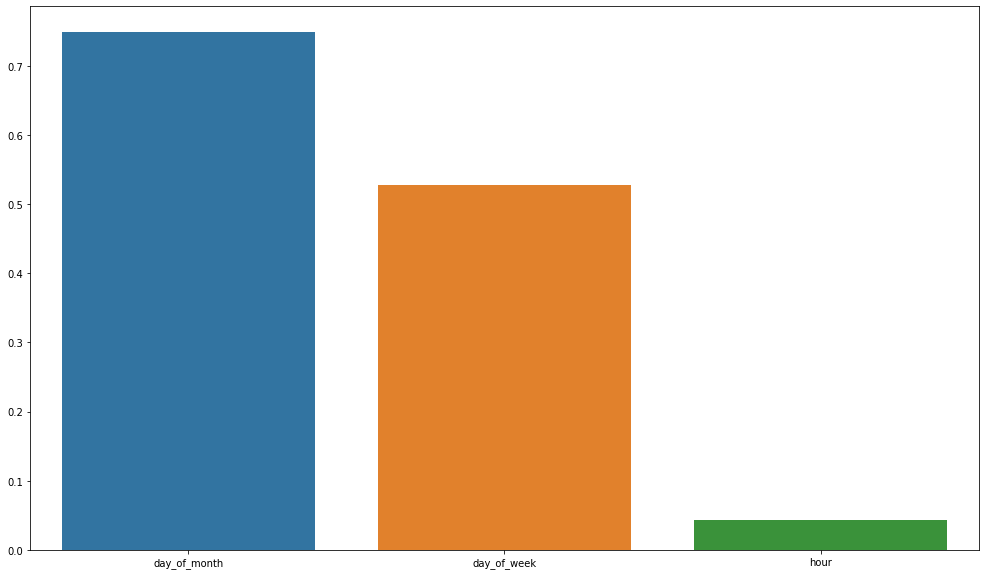

In [65]:
plt.figure(figsize=(17, 10))
sns.barplot(x=X_train.columns[-3:], 
            y=models['B_C2H6'].feature_importances_[-3:])

In [40]:
X_test = Xy_exp_test.drop(columns=['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'])
y_pred = Xy_exp_test.loc[:, ['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']].copy()
for col in y_pred.columns:
    y_pred[col] = models[col].predict(X_test)

In [49]:
models_lasso = {}
for col in y.columns:
    models_lasso[col] = return_best_lasso_model(X_train, y_train[col], X_valid, y_valid[col], 
                                                X, y[col], num_of_evals=500)

X_test = Xy_exp_test.drop(columns=['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10'])
y_pred = Xy_exp_test.loc[:, ['B_C2H6', 'B_C3H8', 'B_iC4H10', 'B_nC4H10']].copy()
for col in y_pred.columns:
    y_pred[col] = models_lasso[col].predict(X_test)

100%|██████████| 500/500 [00:10<00:00, 49.96trial/s, best loss: 17.864334503788776]
{'alpha': 4302.380971279972}
100%|██████████| 500/500 [00:09<00:00, 52.14trial/s, best loss: 3.6827703725199825]
{'alpha': 6741.803526230744}
100%|██████████| 500/500 [00:08<00:00, 58.16trial/s, best loss: 2.1699883052983084]
{'alpha': 2830.173442865464}
100%|██████████| 500/500 [00:08<00:00, 55.71trial/s, best loss: 1.3878737855339125]
{'alpha': 4208.3256138901925}


In [52]:
models_lasso['B_C2H6'].coef_

array([ 0.,  0.,  0., -0., -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,
       -0., -0., -0., -0., -0., -0., -0., -0., -0., -0.,  0., -0.,  0.,
        0.,  0., -0., -0., -0., -0.,  0., -0.,  0.,  0., -0., -0., -0.,
        0.,  0.,  0., -0.,  0., -0.,  0.])

In [50]:
y_pred.to_csv('submission_8_TS_revolution_lasso.csv')